### Statistical Analysis of Fire Intensity Model (Clean) Data Set

### First Step - Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt, time
import matplotlib.mlab as mlab
import matplotlib.style as stl
import matplotlib.image as mpimg
from numpy import median
from numpy.random import randn
from scipy import stats
from sklearn import preprocessing
from pandas.plotting import scatter_matrix

sns.set(style="ticks", color_codes=True)

%matplotlib inline

### Second Step - Loading and Checking the Data - Limiting Sample

In [2]:
# Load Fire Intensity Model CSV File
emstat = pd.read_csv('FireIntensity_Model_June12_Clean.csv').sample(250000)

In [3]:
# Use pandas to view the first 5 rows of the file
emstat.head(5)

,Unnamed: 0,latitude,longitude,doy,month,year,cluster_reference,fire_region,season,covertype,...,visibility,wind_speed,wind_gust,brightness,fire_intensity,fire_intensity_twocat,fire_intensity_threecat,fire_intensity_fourcat,bright_t31,frp
1054237,1054237,36.5772,-118.0116,55,2,2013,2013_585,5,3,2,...,9.216293,16.38,24.11,325.8,High,Moderate,Low,Low,293.9,16.4
1321166,1321166,43.1369,-124.2385,308,11,2015,2015_868,5,2,3,...,9.997000,2.11,3.39,317.7,Medium,Moderate,Low,Low,279.1,20.3
444783,444783,36.8818,-113.7291,200,7,2007,2007_326,4,1,3,...,9.997000,7.06,16.13,365.5,Severe,Moderate,Low,Moderate,321.9,78.6
233466,233466,45.4888,-114.7240,241,8,2005,2005_533,1,1,3,...,9.216293,9.75,18.84,323.7,High,Moderate,Low,Low,297.2,57.3
142507,142507,37.5455,-113.9843,211,7,2004,2004_209,4,1,3,...,9.216293,10.31,20.70,409.8,Severe,Severe,Moderate_to_High,High,303.2,348.8


In [4]:
# What are the dtypes of the columns?
emstat.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250000 entries, 1054237 to 511928
Data columns (total 26 columns):
Unnamed: 0                 250000 non-null int64
latitude                   250000 non-null float64
longitude                  250000 non-null float64
doy                        250000 non-null int64
month                      250000 non-null int64
year                       250000 non-null int64
cluster_reference          250000 non-null object
fire_region                250000 non-null int64
season                     250000 non-null int64
covertype                  250000 non-null int64
fuelcode                   250000 non-null int64
prefire_fuel               250000 non-null float64
fuel_moisture_class        250000 non-null int64
temperature                250000 non-null float64
humidity                   250000 non-null float64
precip_intensity           250000 non-null float64
visibility                 250000 non-null float64
wind_speed                 250000 n

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*emstat.shape))

250000 instances with 26 features



In [6]:
# Checking to see how many years comprise the file
print(emstat['year'].unique())

[2013 2015 2007 2005 2004 2012 2014 2009 2010 2003 2008 2011 2006]


In [7]:
# Reduce columns to focus on most important features
emstat = emstat.drop(columns=['Unnamed: 0','visibility','precip_intensity','fuel_moisture_class','doy','fire_region'])

In [8]:
emstat.shape

(250000, 20)

### Description of Top-Level Key Statistics

In [9]:
# Use pandas to get the summary statistics on the data
emstat.describe()

,latitude,longitude,month,year,season,covertype,fuelcode,prefire_fuel,temperature,humidity,wind_speed,wind_gust,brightness,bright_t31,frp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,37.063136,-99.414961,6.572540,2009.052940,1.333308,2.345648,829.393872,3851.190853,69.933922,0.411391,6.362801,11.673115,323.864929,295.840523,58.922470
std,5.849394,13.992718,3.057568,3.664992,1.047677,0.880047,709.701245,3009.624230,15.008338,0.168608,4.142955,6.036121,22.279708,9.563390,184.269207
min,24.723800,-124.632500,1.000000,2003.000000,0.000000,1.000000,1.000000,19.615050,-9.700000,0.000000,0.000000,0.000000,300.000000,264.500000,-59.200000
25%,32.398075,-114.181075,4.000000,2006.000000,0.000000,1.000000,1.000000,320.453874,60.610000,0.290000,3.550000,7.460000,309.800000,290.200000,10.200000
50%,35.904300,-96.228350,7.000000,2009.000000,1.000000,3.000000,1160.000000,4335.068543,70.340000,0.400000,5.420000,10.880000,317.900000,295.500000,20.400000
75%,41.630000,-87.765225,9.000000,2012.000000,2.000000,3.000000,1280.000000,6989.973251,79.540000,0.530000,8.100000,14.410000,330.200000,300.800000,47.300000
max,48.992500,-67.141200,12.000000,2015.000000,3.000000,3.000000,2950.000000,13337.510830,130.990000,1.000000,55.250000,85.990000,505.800000,400.100000,11528.300000


### Identifying Most Important Features

In [10]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 3 (highest)
emstat['covertype'].value_counts()

3    154950
1     68538
2     26512
Name: covertype, dtype: int64

In [11]:
# A look at what the cover type looks like - with the rankings from 1 (low) to 2900 (highest)
emstat['fuelcode'].value_counts()

1       70400
1160    33870
2       27094
1500    25508
1200    16664
1140    14623
1220    10431
1370    10175
1260     8280
1600     6599
1400     5909
1180     4631
1280     4008
2700     3810
1920     2970
2900     1564
1800     1191
1900      537
1300      284
1100      272
2180      227
1120      198
1360      168
2950      126
1950      118
1940       96
1320       81
1910       69
1340       48
1700       33
1980       14
1990        2
Name: fuelcode, dtype: int64

In [12]:
# Show the data by cover type
print(emstat.groupby('covertype').count())

           latitude  longitude   month    year  cluster_reference  season  \
covertype                                                                   
1             68538      68538   68538   68538              68538   68538   
2             26512      26512   26512   26512              26512   26512   
3            154950     154950  154950  154950             154950  154950   

           fuelcode  prefire_fuel  temperature  humidity  wind_speed  \
covertype                                                              
1             68538         68538        68538     68538       68538   
2             26512         26512        26512     26512       26512   
3            154950        154950       154950    154950      154950   

           wind_gust  brightness  fire_intensity  fire_intensity_twocat  \
covertype                                                                 
1              68538       68538           68538                  68538   
2              26512       2

In [13]:
# These features all increase with each other - no inverse relationships
emstat[['wind_speed', 'wind_gust', 'brightness', 'bright_t31']].agg(['mean','min','max'])

,wind_speed,wind_gust,brightness,bright_t31
mean,6.362801,11.673115,323.864929,295.840523
min,0.000000,0.000000,300.000000,264.500000
max,55.250000,85.990000,505.800000,400.100000


### Fire Intensity Categories Measured Against Data Set Features

In [14]:
# Show the data by fire_intensity 
print(emstat.groupby('fire_intensity').count())

                latitude  longitude  month   year  cluster_reference  season  \
fire_intensity                                                                 
High               62747      62747  62747  62747              62747   62747   
Low                63035      63035  63035  63035              63035   63035   
Medium             61644      61644  61644  61644              61644   61644   
Severe             62574      62574  62574  62574              62574   62574   

                covertype  fuelcode  prefire_fuel  temperature  humidity  \
fire_intensity                                                             
High                62747     62747         62747        62747     62747   
Low                 63035     63035         63035        63035     63035   
Medium              61644     61644         61644        61644     61644   
Severe              62574     62574         62574        62574     62574   

                wind_speed  wind_gust  brightness  fire_intens

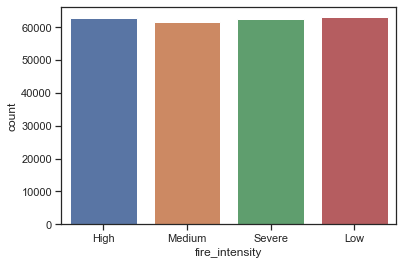

In [15]:
# Fire Intensity by category
sns.countplot(emstat['fire_intensity'],label="Count")
plt.show()

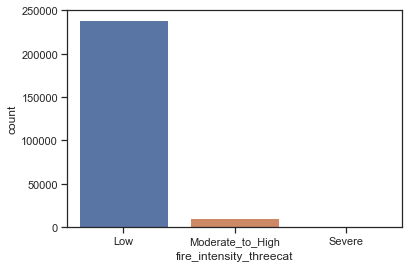

In [16]:
sns.countplot(emstat['fire_intensity_threecat'],label="Count")
plt.show()

### Looking at Histograms illustrating key Fire Intensity features

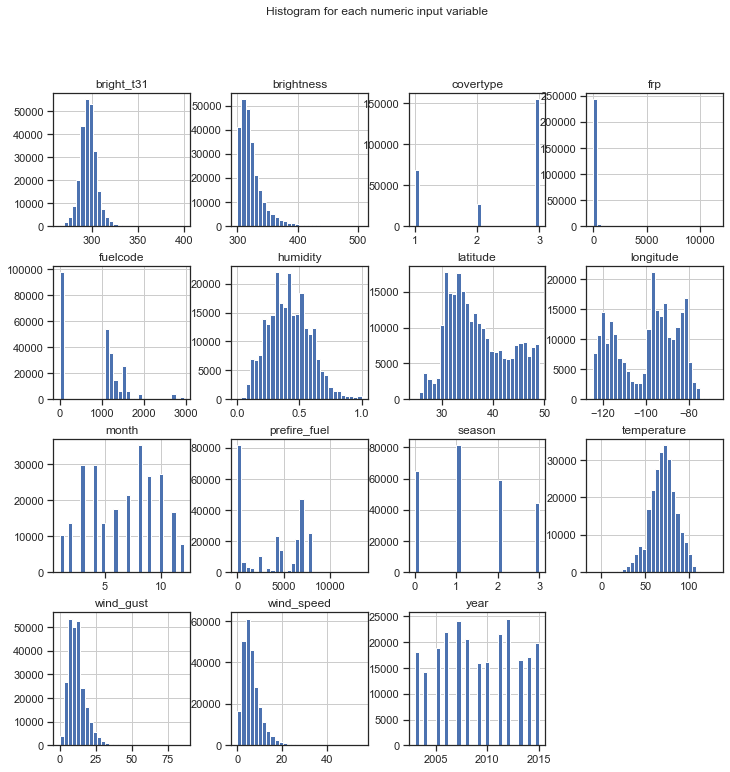

In [17]:
# Historgram of all numerical data
emstat.hist(bins=30, figsize=(12,12))
plt.suptitle("Histogram for each numeric input variable")
plt.show()

### Limiting the dataset again - this time within the state of California for processing efficiency
#### * This step reduces the number of instances from 250,000 to 61,234 

In [18]:
# Limiting data to state of California
emstat_west = emstat[(emstat.latitude > 34) & (emstat.longitude < -114)]

In [19]:
# Did we reduce the size of the data?
emstat_west.shape

(61393, 20)

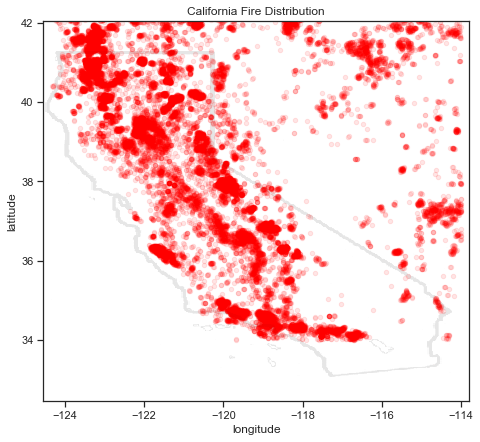

In [20]:
# California Fire Distribution Map

california_img=mpimg.imread('CaliforniaMapOutline.gif')
emstat_west.plot(kind="scatter", x="longitude", y="latitude", c= "red", figsize=(10,7), alpha=0.1)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.1)
plt.title('California Fire Distribution') 
plt.show()

### Following three (3) Pair Plots showing pairwise relationships between three select primary features

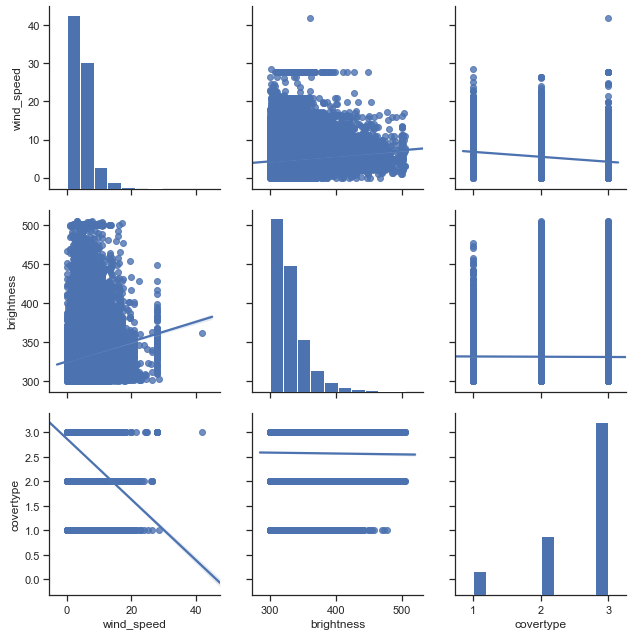

In [21]:
# Pairplot Analysis Part 1
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','brightness','covertype'], kind="reg")

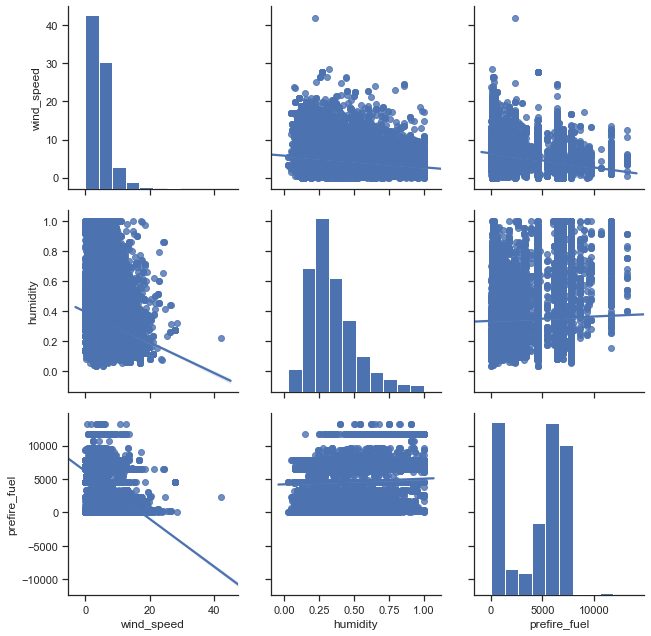

In [22]:
# Pairplot Analysis Part 2
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','prefire_fuel'], kind="reg")

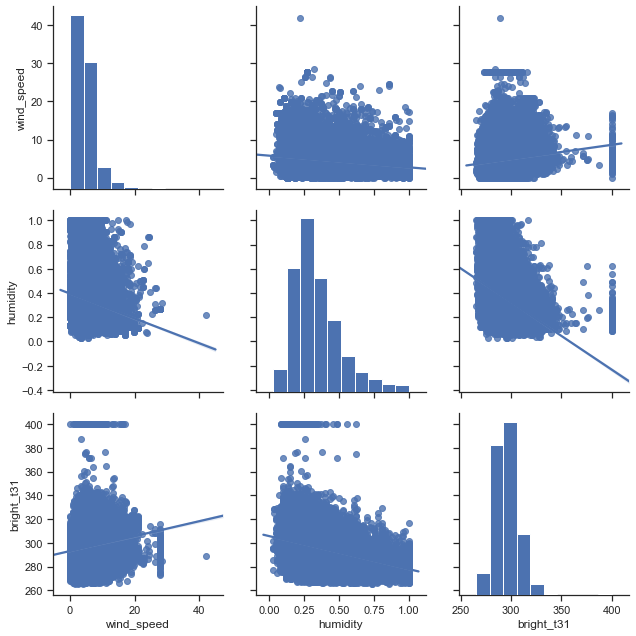

In [23]:
# Pairplot Analysis Part 3
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','humidity','bright_t31'], kind="reg")

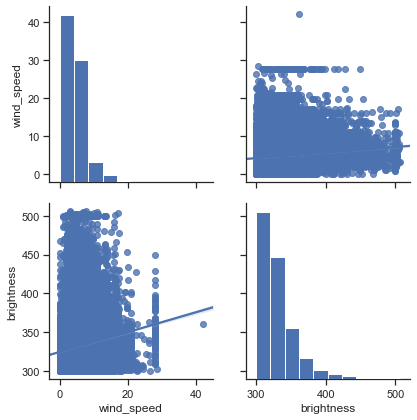

In [24]:
# Pairplot Analysis Part 4
g = sns.pairplot(emstat_west, height=3, vars=['wind_speed','brightness'], kind="reg")

### Statistical Correlation of Fire Intensity Measures of Performance

#### * The group indicated that humidity, wind speed, prefire-fuel, brightness, and cover type are the preferred features

In [25]:
# Correlation Analysis of key intensity indicators part 1
x_values = emstat_west['humidity']
y_values = emstat_west['wind_speed']
z_values = emstat_west['prefire_fuel']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of humidity and windspeed: {r_squared1:.9f}")
print(f"R2 Correlation of humidity and prefire_fuel: {r_squared2:.9f}")
print(f"R2 Correlation of wind_speed and prefire_fuel: {r_squared3:.9f}")

R2 Correlation of humidity and windspeed: 0.031400635
R2 Correlation of humidity and prefire_fuel: 0.002476197
R2 Correlation of wind_speed and prefire_fuel: 0.132812100


In [26]:
# Correlation Analysis of key intensity indicators part 2
x_values = emstat_west['wind_speed']
y_values = emstat_west['brightness']
z_values = emstat_west['fuelcode']

correlation_matrix1 = np.corrcoef(x_values, y_values)
correlation_matrix2 = np.corrcoef(x_values, z_values)
correlation_matrix3 = np.corrcoef(y_values, z_values)
correlation_xy = correlation_matrix1[0,1]
correlation_xz = correlation_matrix2[0,1]
correlation_yz = correlation_matrix3[0,1]
r_squared1 = correlation_xy**2
r_squared2 = correlation_xz**2
r_squared3 = correlation_yz**2

print(f"R2 Correlation of windspeed and brightness: {r_squared1:.9f}")
print(f"R2 Correlation of windspeed and fuelcode: {r_squared2:.9f}")
print(f"R2 Correlation of brightness and fuelcode: {r_squared3:.9f}")

R2 Correlation of windspeed and brightness: 0.018661473
R2 Correlation of windspeed and fuelcode: 0.118979408
R2 Correlation of brightness and fuelcode: 0.002786746


### Visualizing the distribution with five Kernal Density Estimates

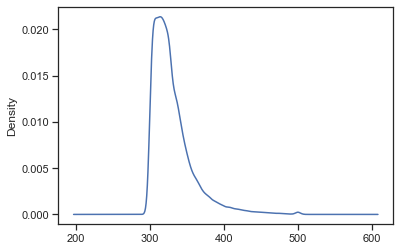

In [27]:
emstat_west['brightness'].plot(kind='kde')

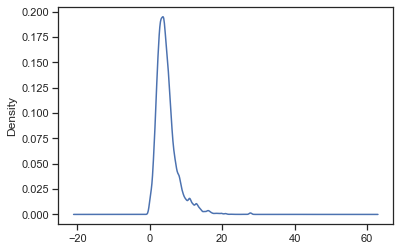

In [28]:
emstat_west['wind_speed'].plot(kind='kde')

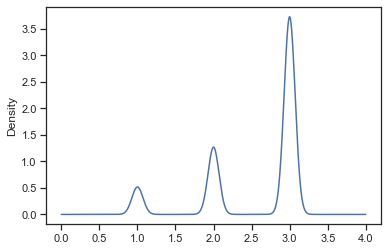

In [29]:
emstat_west['covertype'].plot(kind='kde')

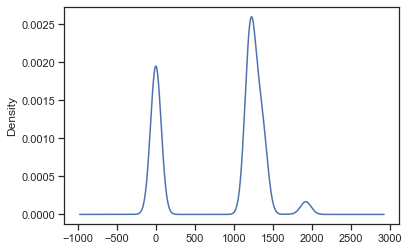

In [30]:
emstat_west['fuelcode'].plot(kind='kde')

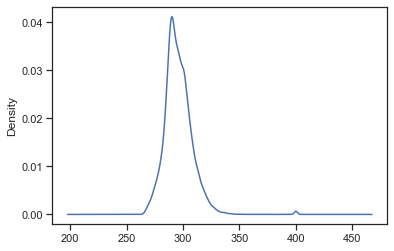

In [31]:
emstat_west['bright_t31'].plot(kind='kde')

### Scatter Plot Matrix to show multiple visualizations between fire intensity features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD32C94C8>,
      dtype=object)

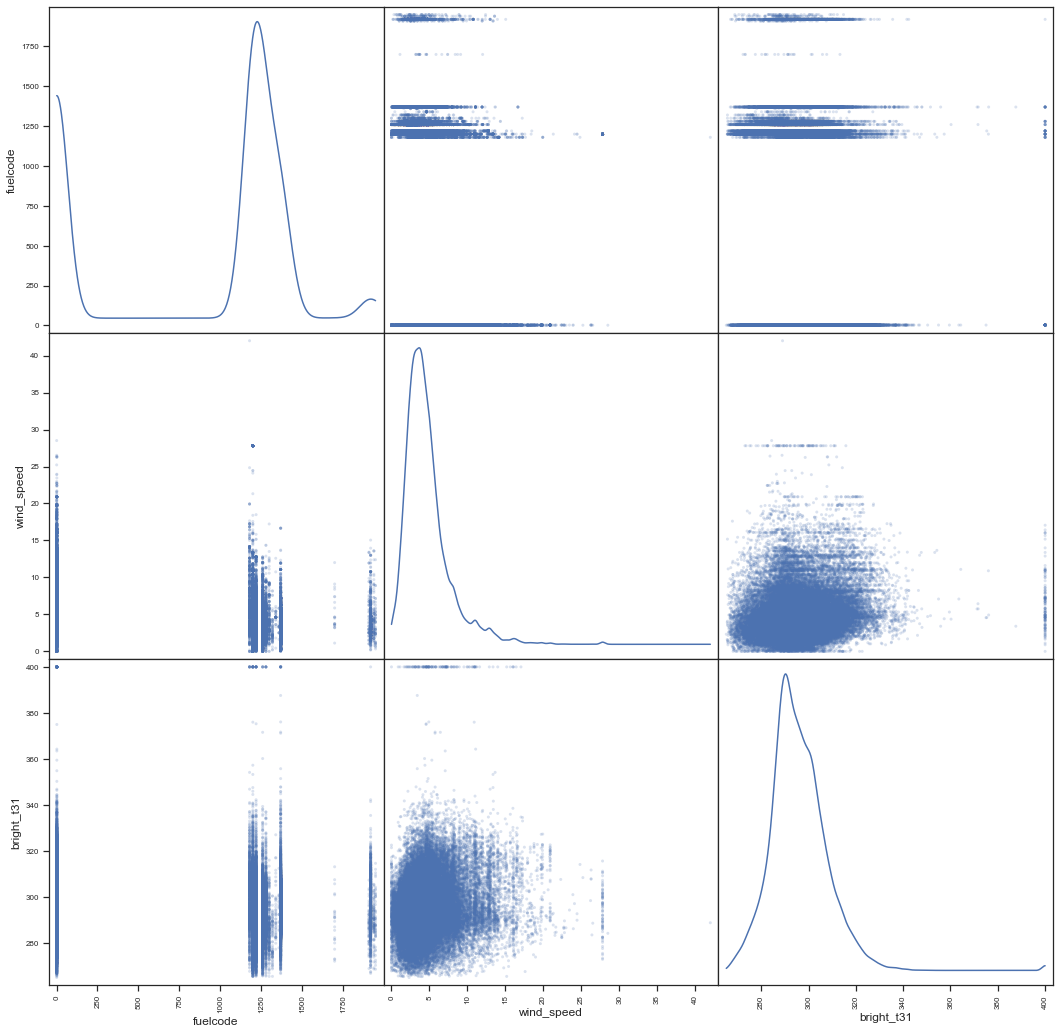

In [32]:
areas = emstat_west[['fuelcode','wind_speed','bright_t31']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020BD2001A48>,
      dtype=object)

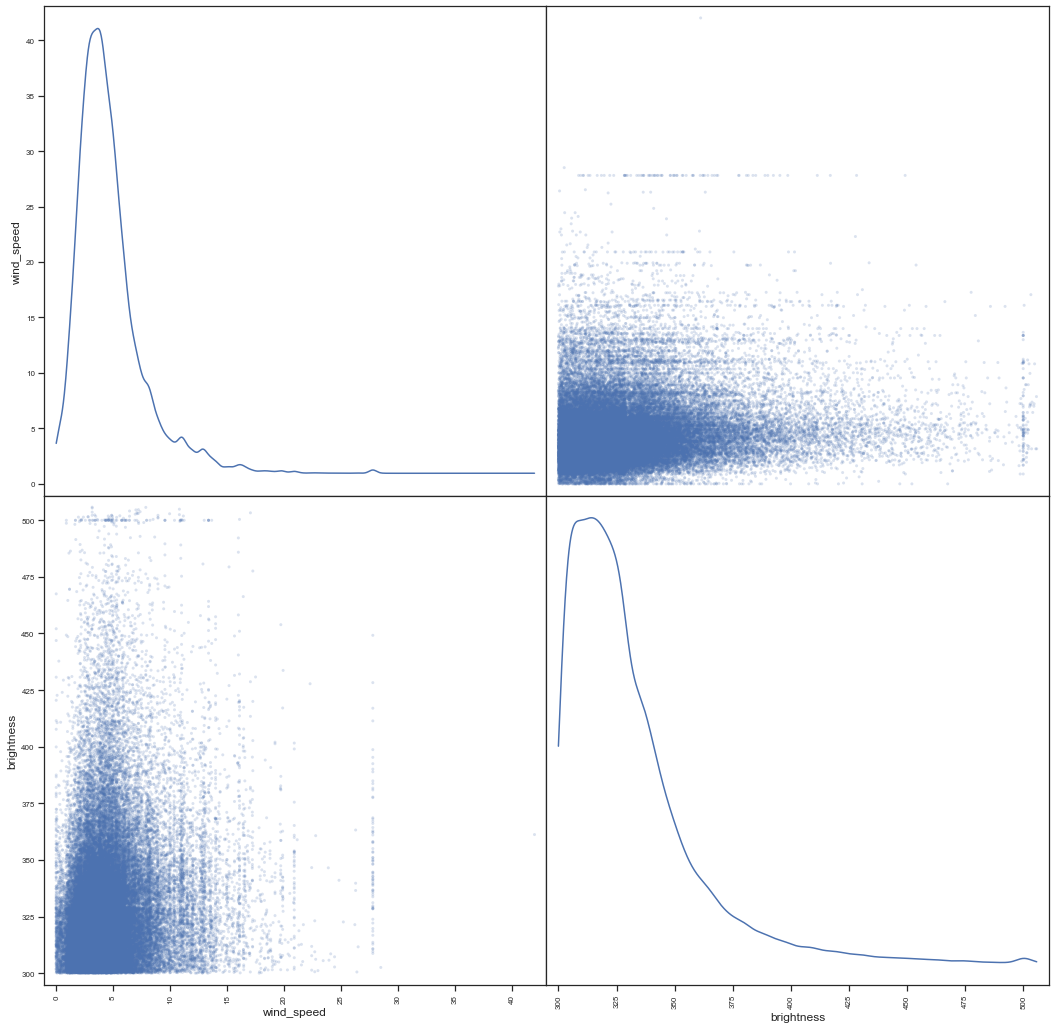

In [33]:
areas = emstat_west[['wind_speed','brightness']]
scatter_matrix(areas, alpha=0.2, figsize=(18,18), diagonal='kde')

### Following Joint Plots shows pairwise relationships between two alternating features

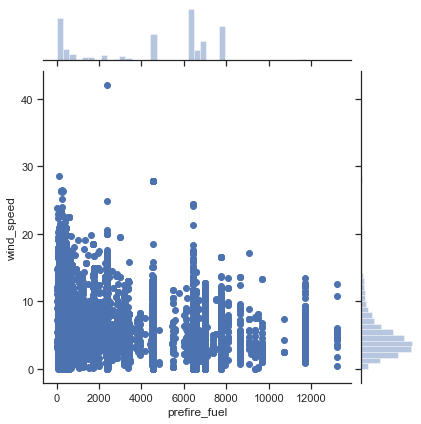

In [34]:
g = sns.jointplot("prefire_fuel", "wind_speed", emstat_west)

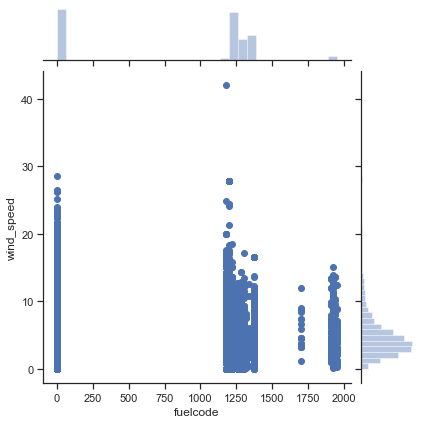

In [35]:
g = sns.jointplot("fuelcode", "wind_speed", emstat_west)

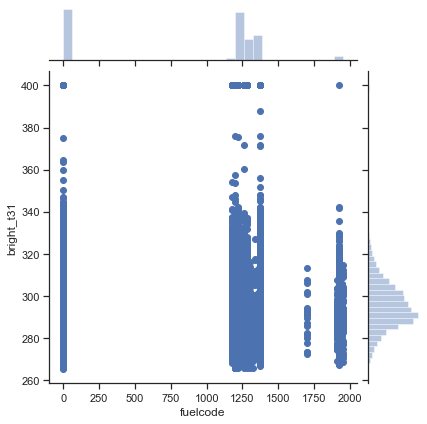

In [36]:
g = sns.jointplot("fuelcode", "bright_t31", emstat_west)

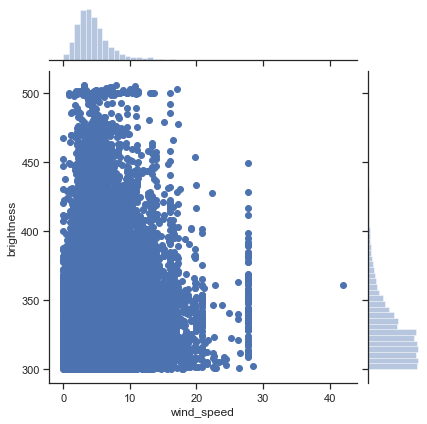

In [37]:
g = sns.jointplot("wind_speed", "brightness", emstat_west)

### Following Regression Plot shows multivariate relationships between pairings of the dataset features

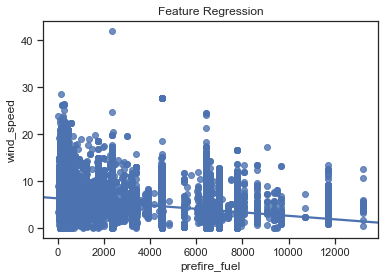

In [38]:
sns.regplot(x="prefire_fuel", y="wind_speed", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

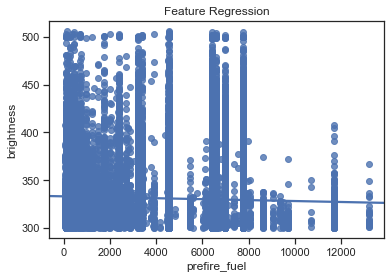

In [39]:
sns.regplot(x="prefire_fuel", y="brightness", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

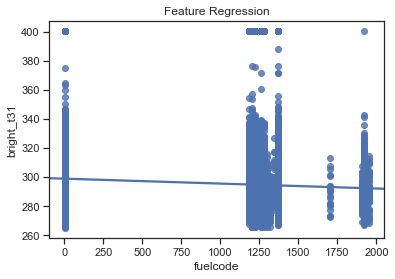

In [40]:
sns.regplot(x="fuelcode", y="bright_t31", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

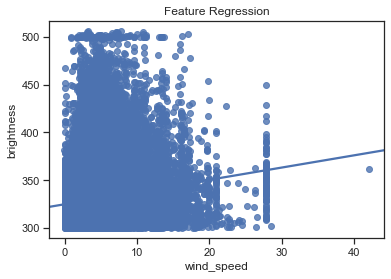

In [41]:
sns.regplot(x="wind_speed", y="brightness", data=emstat_west,  ci=None, x_jitter=.05)
plt.title("Feature Regression")
plt.show()

### Following Violin Plot shows variable distribution between bright_t31 and fire intensity 3 category

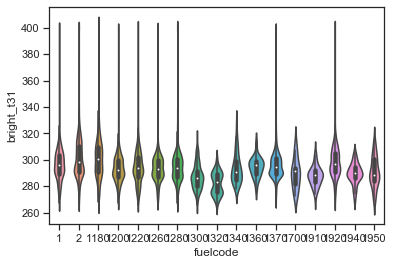

In [42]:
 ax = sns.violinplot(x="fuelcode", y="bright_t31", data=emstat_west)